<a href="https://colab.research.google.com/github/Tharun173/CSE22173-ML-LAB/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# nA1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

purchase_data = pd.read_excel('Lab Session Data.xlsx' , sheet_name='Purchase data')



A = purchase_data.iloc[:,1:4].values
C = purchase_data.iloc[:,4].values

# Dimensionality of Vector space

dimensionality = A.shape[1]

num_vectors = A.shape[0]

rank_A = np.linalg.matrix_rank(A)

# pseudo inverse of A

A_pinv = np.linalg.pinv(A)

# Cost of each product
product_costs = A_pinv.dot(C)


# Output the results
print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in the vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print("Cost of each product:", product_costs)

Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product: [ 1. 55. 18.]


In [ ]:
# A2

# Model vector X

X = A_pinv.dot(C)
X

array([ 1., 55., 18.])

In [ ]:
# A3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

purchase_data['Classification']=np.where(purchase_data['Payment (Rs)'] > 200 ,'RICH','POOR')


M = purchase_data.iloc[:,1:4].values
N = purchase_data['Classification'].values

M_train, M_test, N_train, N_test = train_test_split(M, N, test_size=0.4, random_state=42)

classifier = LogisticRegression()
classifier.fit(M_train, N_train)

N_pred = classifier.predict(M_test)

accuracy = accuracy_score(N_test, N_pred)
classification_rep = classification_report(N_test, N_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
# A4

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

stock_data = pd.read_excel('Lab Session Data.xlsx',sheet_name='IRCTC Stock Price')


mean = statistics.mean(stock_data['Price'])
variance = statistics.variance(stock_data['Price'])

wed_data = stock_data['Day'] =='Wed'
wed_data_values = stock_data[wed_data]

wed_data_mean = statistics.mean(wed_data_values['Price'])

print(f"The wed data mean is {wed_data_mean} and pop mean is {mean}")

april_data = stock_data['Month'] == 'Apr'
april_data_values = stock_data[april_data]

april_data_mean = statistics.mean(april_data_values['Price'])


print(f"The april data mean is {april_data_mean} and pop mean is {mean}")



The wed data mean is 1550.706 and pop mean is 1560.663453815261
The april data mean is 1698.9526315789474 and pop mean is 1560.663453815261


In [ ]:
chg_data = stock_data['Chg%'].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)

chg_loss_data = chg_data < 0
chg_loss_data_values = chg_data[chg_loss_data]

prob_loss = len(chg_loss_data_values) / len(chg_data)

print(f"The probability of loss is {prob_loss}")


wed_data_chg = wed_data_values['Chg%'].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)
wed_data_profit_chg = wed_data_chg > 0
wed_data_profit_chg_values = wed_data_chg[wed_data_profit_chg]

prob_profit_wed = len(wed_data_profit_chg_values)/len(wed_data_chg)

print(f"The probability of profit on Wednesday is {prob_profit_wed}")

prob_of_wed = len(stock_data[stock_data['Day'] == 'Wed'])/len(stock_data)

prob_of_profit_given_wed = prob_profit_wed/prob_of_wed

print(f"The probability of profit given today is Wednesday is {prob_of_profit_given_wed}")




The probability of loss is 0.4979919678714859
The probability of profit on Wednesday is 0.42
The probability of profit given today is Wednesday is 2.0916


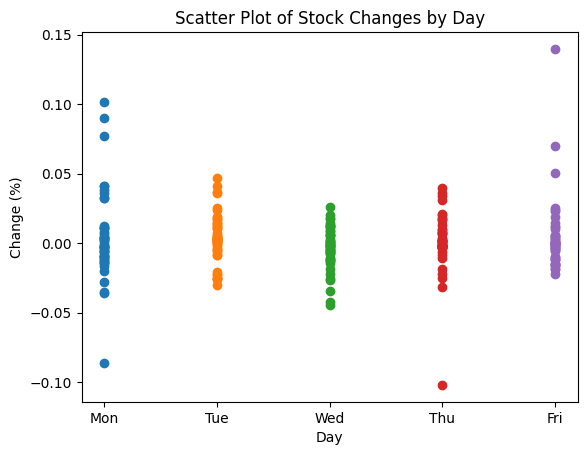

In [ ]:
#scatter plot
import matplotlib.pyplot as plt

days = ['Mon' ,'Tue' ,'Wed' ,'Thu' ,'Fri']
series_list =[]
for day in days:
    day_data = stock_data[stock_data['Day'] == day]['Chg%']
    series_list.append(day_data)


# print(['Mon'] * len(day_data))
# plt.scatter(days, series_list
# Plot each series individually
for day, day_data in zip(days, series_list):
    plt.scatter([day] * len(day_data), day_data)

plt.xlabel('Day')
plt.ylabel('Change (%)')
plt.title('Scatter Plot of Stock Changes by Day')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


thyroid_data = pd.read_excel('Lab Session Data.xlsx' , sheet_name='thyroid0387_UCI')

thyroid_data.dtypes

cat_cols = thyroid_data.select_dtypes(include=['object']).columns
num_cols = thyroid_data.select_dtypes(include=['int64']).columns


# for i in cat_cols:
#     values=thyroid_data[i].unique()
#     # print("Unique values in column",i," ",values)

#     if len(values) < 100:
#             # print(f"Suggested Encoding: Label Encoding")
#             thyroid_data[i] = thyroid_data[i].astype('category').cat.codes
#     else:
#         # print(f"Suggested Encoding: One-Hot Encoding")
#         thyroid_data = pd.get_dummies(thyroid_data, columns=[i], prefix=[i])

for i in num_cols:
    print("Data range for numeric attributes such as", i," is ",thyroid_data[i].min()," to ",thyroid_data[i].max())


thyroid_data.replace('?', np.nan, inplace=True)

print("Number of missing values in each feature")
missing_values = thyroid_data.isnull().sum()
print(missing_values)

# # outliers using Z-score

threshold = 3

for i in num_cols:
    # Calculate mean and standard deviation for the current column
    m = np.mean(thyroid_data[i])
    sd = np.std(thyroid_data[i])

    # Calculate Z-scores and store them in a new column specific to the current column
    thyroid_data[f'{i}_z_score'] = (thyroid_data[i] - m) / sd

# Define a threshold for detecting outliers
threshold = 3  # Example: threshold of 3 for Z-scores

for i in num_cols:
    # Identify outliers based on Z-score threshold
    outliers = thyroid_data[np.abs(thyroid_data[f'{i}_z_score']) > threshold]

    # Print the outliers for the current column
    if not outliers.empty:
        print(f"Outliers in column {i}:")
        print(outliers[[i, f'{i}_z_score']])
    else:
        print(f"No outliers found in column {i}.")








Data range for numeric attributes such as Record ID  is  840801013  to  870119035
Data range for numeric attributes such as age  is  1  to  65526
Number of missing values in each feature
Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                   

In [ ]:
# Check for missing values in a specific column

for i in num_cols:
    has_missing_values = thyroid_data[i].isnull().any()
    if has_missing_values:
        print(f"The column '{i}' has missing values.")
    else:
        print(f"The column '{i}' does not have missing values.")


The column 'Record ID' does not have missing values.
The column 'age' does not have missing values.


In [ ]:
for i in cat_cols:
    # Check if the column has missing values
    has_missing_values = thyroid_data[i].isnull().any()

    if has_missing_values:
        # Print which column has missing values
        print(f"The column '{i}' has missing values.")

        # Fill missing values with the mode (most frequent value)
        mode_value = thyroid_data[i].mode()[0]  # mode() returns a Series; [0] gets the mode value
        thyroid_data[i].fillna(mode_value, inplace=True)

        # Optional: Print a confirmation message
        print(f"Filled missing values in column '{i}' with mode: {mode_value}")


In [ ]:
for i in cat_cols:
    has_missing_values = thyroid_data[i].isnull().any()
    if has_missing_values:
        print(f"The column '{i}' has missing values.")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
min_max_scaler = MinMaxScaler()

# Apply to numeric columns that need normalization
for col in num_cols:
    thyroid_data[col] = min_max_scaler.fit_transform(thyroid_data[[col]])
    print(thyroid_data[col])


0       0.000000e+00
1       3.410871e-08
2       9.891527e-07
3       6.934301e-05
4       6.937712e-05
            ...     
9167    9.999996e-01
9168    9.999996e-01
9169    9.999997e-01
9170    9.999997e-01
9171    1.000000e+00
Name: Record ID, Length: 9172, dtype: float64
0       0.000427
1       0.000427
2       0.000610
3       0.000534
4       0.000473
          ...   
9167    0.000839
9168    0.000320
9169    0.001038
9170    0.000702
9171    0.000458
Name: age, Length: 9172, dtype: float64


In [ ]:
import pandas as pd

# Assuming thyroid_data is your DataFrame and only binary columns are needed
binary_cols = [col for col in thyroid_data.columns if sorted(thyroid_data[col].unique()) == [0, 1]]

# Extract the first two observation vectors considering only binary attributes
vec1 = thyroid_data.loc[0, binary_cols]
vec2 = thyroid_data.loc[1, binary_cols]

# Print the vectors
print("Vector 1:")
print(vec1)
print("\nVector 2:")
print(vec2)
# Calculate the Jaccard Coefficient
a = sum((vec1 == 1) & (vec2 == 1))  # Both are 1
b = sum((vec1 == 1) & (vec2 == 0))  # First is 1, second is 0
c = sum((vec1 == 0) & (vec2 == 1))  # First is 0, second is 1

jc = a / (a + b + c)

# Calculate the Simple Matching Coefficient
d = sum((vec1 == 0) & (vec2 == 0))  # Both are 0

smc = (a + d) / (a + b + c + d)

print(f"Jaccard Coefficient: {jc}")
print(f"Simple Matching Coefficient: {smc}")


Vector 1:
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            1
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 1
T3 measured                  0
TT4 measured                 0
T4U measured                 0
FTI measured                 0
TBG measured                 0
Name: 0, dtype: object

Vector 2:
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid        

In [ ]:
import pandas as pd
import numpy as np

# Extract the complete vectors for the first two observations
vec1 = thyroid_data.loc[0]
vec2 = thyroid_data.loc[1]

# Ensure the vectors contain only numeric data
vec1 = pd.to_numeric(vec1, errors='coerce')
vec2 = pd.to_numeric(vec2, errors='coerce')

# Drop any NaN values resulting from conversion
vec1 = vec1.dropna()
vec2 = vec2.dropna()

# Check if the vectors are still of the same length
if len(vec1) != len(vec2):
    raise ValueError("Vectors are of different lengths after cleaning. Cannot calculate Cosine Similarity.")

# Print the vectors to verify
print("Vector 1:")
print(vec1)
print("\nVector 2:")
print(vec2)

# Calculate the dot product
dot_product = np.dot(vec1, vec2)

# Calculate the magnitudes of the vectors
magnitude_vec1 = np.sqrt(np.dot(vec1, vec1))
magnitude_vec2 = np.sqrt(np.dot(vec2, vec2))

# Calculate the Cosine Similarity
cosine_similarity = dot_product / (magnitude_vec1 * magnitude_vec2)

print(f"\nCosine Similarity: {cosine_similarity}")


Vector 1:
Record ID                      0.000000
age                            0.000427
sex                            0.000000
on thyroxine                   0.000000
query on thyroxine             0.000000
on antithyroid medication      0.000000
sick                           0.000000
pregnant                       0.000000
thyroid surgery                0.000000
I131 treatment                 0.000000
query hypothyroid              1.000000
query hyperthyroid             0.000000
lithium                        0.000000
goitre                         0.000000
tumor                          0.000000
hypopituitary                  0.000000
psych                          0.000000
TSH measured                   1.000000
TSH                            0.300000
T3 measured                    0.000000
T3                             1.800000
TT4 measured                   0.000000
TT4                          101.000000
T4U measured                   0.000000
T4U                           

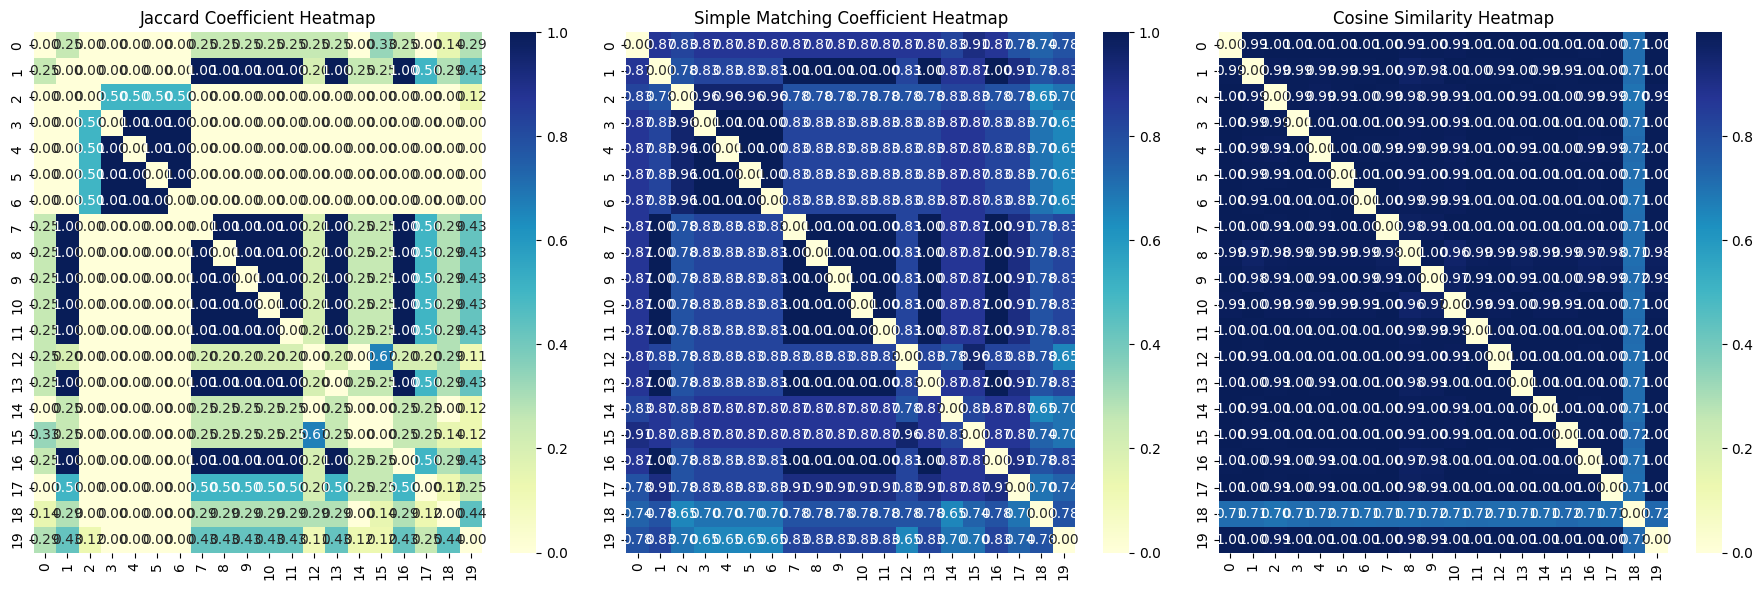

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first 20 observation vectors
n = 20
data_subset = thyroid_data.head(n)

# Initialize matrices to store similarity measures
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cosine_matrix = np.zeros((n, n))

# Define a function to compute Jaccard Coefficient
def compute_jaccard(vec1, vec2):
    a = np.sum((vec1 == 1) & (vec2 == 1))  # Both are 1
    b = np.sum((vec1 == 1) & (vec2 == 0))  # First is 1, second is 0
    c = np.sum((vec1 == 0) & (vec2 == 1))  # First is 0, second is 1
    return a / (a + b + c) if (a + b + c) > 0 else 0

# Define a function to compute Simple Matching Coefficient
def compute_smc(vec1, vec2):
    a = np.sum((vec1 == 1) & (vec2 == 1))  # Both are 1
    d = np.sum((vec1 == 0) & (vec2 == 0))  # Both are 0
    return (a + d) / (a + np.sum((vec1 == 1) & (vec2 == 0)) + np.sum((vec1 == 0) & (vec2 == 1)) + d)

# Define a function to compute Cosine Similarity
def compute_cosine(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude_vec1 = np.sqrt(np.dot(vec1, vec1))
    magnitude_vec2 = np.sqrt(np.dot(vec2, vec2))
    return dot_product / (magnitude_vec1 * magnitude_vec2) if (magnitude_vec1 * magnitude_vec2) > 0 else 0

# Calculate similarity measures
for i in range(n):
    for j in range(n):
        if i != j:
            vec1 = data_subset.iloc[i]
            vec2 = data_subset.iloc[j]

            # Convert to numeric and handle missing values
            vec1 = pd.to_numeric(vec1, errors='coerce').fillna(0)
            vec2 = pd.to_numeric(vec2, errors='coerce').fillna(0)

            # Compute and store similarities
            jc_matrix[i, j] = compute_jaccard(vec1, vec2)
            smc_matrix[i, j] = compute_smc(vec1, vec2)
            cosine_matrix[i, j] = compute_cosine(vec1, vec2)

# Plot heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()
